# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [10]:
# Import the appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib import style

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv") 
# Create two new dataframes

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [17]:
# Put your EDA code here
#north_df.value_counts()
north_rep =north_df["Rep ID"].value_counts().count()
north_rep

#so there are 9 reps at north and 11 reps at south.

9

In [35]:
north_df.head(50)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [20]:
south_df.value_counts()
south_rep = south_df["Rep ID"].value_counts().count()
south_rep

11

In [23]:
north_df.describe()
#ave.busy.min 245,not.red.min.245, dur.call.wait 245, incom.wait.t 82

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [24]:
south_df.describe()
#ave.bus.min 314, not.red.min 314, dur.wa.min 314, incom.wa.min 126.

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [27]:
north_call_time_block = north_df["Time Block"].value_counts()
north_call_time_block

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [29]:
south_call_time_block = south_df["Time Block"].value_counts()
south_call_time_block

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch? north has 9 reps and south has 11 reps
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
 north average for all except for incoming wait time is 245, incoming wait time is 82.
 south average for all except for incoming wait time is 314, incoming wait time is 126.
3. What is the number of calls taken for each time block?
for north we have, which equals to 245 calls a day.
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
 
For south we have, which equals to 314 calls a day.
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5 

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [ ]:
#question 1 answer: No
#question 2 answer: One of the yes had a space which did not give the correct sales value so I used .replace to update yes_ to yes with no space and they could all be counted together.
#question 3 answer: It didn't seemed like there were but I still used df.drop_duplicates() just in case I was missing something.nothing really changed that i noticed.
#question 4 answer: No

In [32]:
# Clean your data here
north_in_out = north_df["Incoming or Outgoing"].value_counts()
north_in_out

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64

In [33]:
south_in_out = south_df["Incoming or Outgoing"].value_counts()
south_in_out

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64

In [39]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [45]:
north_IWT = north_df["Incoming Wait Time"].value_counts(dropna=False)
north_IWT

NaN    163
4.0     20
1.0     17
5.0     17
2.0     16
3.0     12
Name: Incoming Wait Time, dtype: int64

In [46]:
south_IWT = south_df["Incoming Wait Time"].value_counts(dropna=False)
south_IWT

NaN    188
4.0     30
3.0     29
2.0     28
1.0     20
5.0     19
Name: Incoming Wait Time, dtype: int64

In [119]:
yes_n = north_df["Sale"].value_counts()
yes_n

Fix_yes = north_df["Sale"].str.replace("YES ", "YES")
Fix_yes.value_counts()
north_df["Sale"] = Fix_yes
north_df["Sale"].value_counts()



NO     234
YES     11
Name: Sale, dtype: int64

In [290]:
south_df.duplicated(subset=None) == True

0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool

In [291]:
south_df.drop_duplicates()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [223]:
df = north_df.append(south_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

In [47]:
# Manipulate data here
#question 1 sort by calls to determine rep with highest calls.
north_reps = north_df.groupby("Rep ID").sum()
north_reps.sort_values("Calls", ascending=False)
# Brent gets the most calls with 37. #nice

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Lilly,3375,0,2,307,59,37.0,88,30
Duke,2999,2,0,292,56,39.0,85,29
Todd,4252,1,0,296,58,21.0,97,29
Joe,3178,0,0,256,49,36.0,81,26
Cam,2746,1,0,233,46,32.0,66,24
Xander,3340,1,0,244,44,20.0,68,24
Amanda,2666,0,1,229,43,12.0,60,23
Andy,2494,0,3,228,43,36.0,65,23


In [48]:
south_reps = south_df.groupby("Rep ID").sum()
south_reps.sort_values("Calls", ascending=False)
#Eric has 35 calls.

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
George,4620,0,0,298,53,41.0,87,29
Kate,4615,0,0,291,61,37.0,83,29
Karl,4532,1,0,287,61,26.0,85,28
Josh,3960,3,0,260,50,31.0,83,26
Susan,4006,2,0,267,53,35.0,88,26


In [51]:
#question 2: what is the average call abandon for each branch, whole comp, and fall out of optimal range 2-5%?
North_abandon = ((north_df["Abandoned"].sum()/north_df["Calls"].sum())*100).round(2)
North_abandon

#North abandon rate is 2.86% which is pretty good. could do better. Does not fall out of optimal range.

2.86

In [52]:
south_abandon = ((south_df["Abandoned"].sum()/south_df["Calls"].sum())*100).round(2)
south_abandon
#South company doing better with a 1.27% abandone calls. 

1.27

In [79]:
# number_list = [2.86, 1.27]
# avg = sum(number_list)/len(number_list)
# print("The average is ", round(avg,2))

#The company average is 2.o6% still a good average, though i might be doing wrong equation....ugh math

In [221]:
df = north_df.append(south_df)
df
df_abandon = ((df["Abandoned"].sum()/df["Calls"].sum())*100).round(2)
df_abandon
# The company Average is 1.97, thats better. 

1.97

In [84]:
#question 4
df.describe()
#incoming wait time for company is 3.019231, looking at the mean.

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,559.000000,559.000000,559.000000,559.000000,559.000000,208.000000,559.000000,559.0
mean,141.379249,0.028623,0.019678,10.025045,1.912343,3.019231,3.028623,1.0
std,84.340108,0.166893,0.139016,1.405091,0.821644,1.365417,0.831225,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,69.500000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,139.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,209.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [185]:
#question 4
north_df.describe()
#incoming wait time for North is 3.048780.
south_df.describe()
#incoming wait time for south is 3.000000.
#so the average speed of answer is around 3 seconds on average.

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [189]:
#question 3 call center efficiency(CCE), percentage of calls(POC).
CCE_sec_north = (north_df["Incoming Wait Time"] <= 2.0).sum()
CCE_sec_north
#33

POC_north = (CCE_sec_north/north_df["Calls"].sum()*100).round(2)
POC_north
#13.47% of calls are answered withing 2 seconds at North.

33

In [292]:
#south_df.head()

In [95]:
#question 3 for south call center efficiency(cce), percentage of calls (poc).
cce_sec_south = (south_df["Incoming Wait Time"] <= 2.0).sum()
cce_sec_south
#48

poc_south = (cce_sec_south/south_df["Calls"].sum()*100).round(2)
poc_south
#south branch has a 15.29% of calls answered within 2 seconds.

15.29

In [121]:
# poc_company = (POC_north/poc_south["Calls"].sum()*100).round(2)
# poc_company
df = north_df.append(south_df)
df
df_cce = (df["Incoming Wait Time"] <= 2.0).sum()
df_cce
#81
df_poc = ((df_cce/df["Calls"].sum())*100).round(2)
df_poc
#Company percentage is 14.49% calls answered within 2 seconds.

14.49

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [ ]:
#Question 1 answer
#Brent has the most calls with 37 at the north branch, Eric has 35 at the south branch.
#question 2
# The call abandonement range is: North 2.86%, South 1.27% and Company 1.97%. From the data given while South and the 
#company are less that 2 % That is still very optimal, and North is within the optimal range so No they dont fall out.
#Question 3
#Percentage :North 13.47%, South 15.29%, and Company 14.49%.
#Question 4
#Average speed of answer is : North 3.048780 seconds, South 3.000000 seconds, Company 3.019231 seconds


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

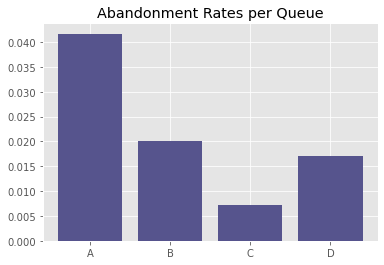

In [318]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center', color= '#56548d')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.title('Abandonment Rates per Queue',color = 'black')
plt.show()

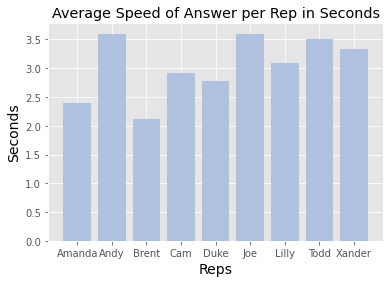

In [319]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
style.use('ggplot')
north_df_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.title('Average Speed of Answer per Rep in Seconds')
plt.xlabel('Reps', fontsize = 14, color = 'black')
plt.ylabel('Seconds', fontsize = 14, color = 'black')
plt.bar(north_df_plt['Rep ID'], north_df_plt["Incoming Wait Time"], color = '#b0c1e0')

plt.show()


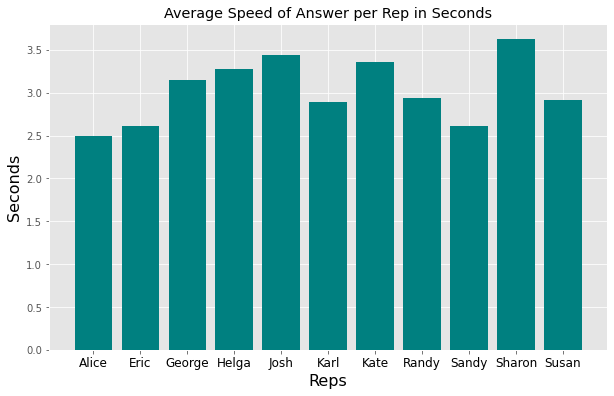

In [313]:
#style.use('ggplot')


south_df_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.figure(figsize=(10,6))
plt.title('Average Speed of Answer per Rep in Seconds')
plt.xlabel('Reps', fontsize = 16, color = 'black')
plt.ylabel('Seconds', fontsize = 16, color = 'black')
plt.bar(south_df_plt['Rep ID'], south_df_plt["Incoming Wait Time"], color = '#008080')
#south_df.head(12).plot(y = "Incoming Wait Time", x= "Rep ID", kind = "bar")
plt.xticks(color = 'Black', fontsize = 12)  
plt.show()


<AxesSubplot:xlabel='Rep ID'>

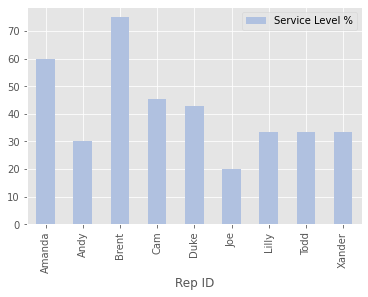

In [320]:
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
quick_stats

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
total_stats

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level.plot(y= "Service Level %", kind = "bar", color= ["#b0c1e0"])

<AxesSubplot:xlabel='Rep ID'>

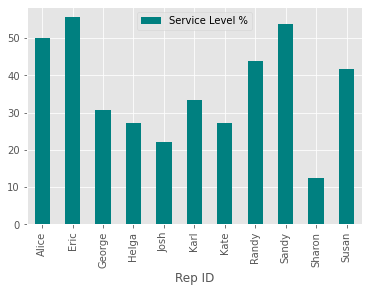

In [314]:
# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level.plot(y= "Service Level %", kind = "bar", color= ["#008080"])

In [271]:
# # Table 1: Total Incoming calls less than 2 seconds grouped by Rep
# quick_calls = df[df["Incoming Wait Time"] <= 2.0]
# quick_reps = quick_calls[["Rep ID", "Calls"]]
# quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# # Table 2: Total Incoming Calls Only grouped by Rep
# total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
# rep_calls = total_calls_in[["Rep ID", "Calls"]]     
# total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
# service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# # Create Percentage Column in Table 3
# service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# service_level.plot(y= "Service Level %", kind = "bar", color= ["Green"])

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


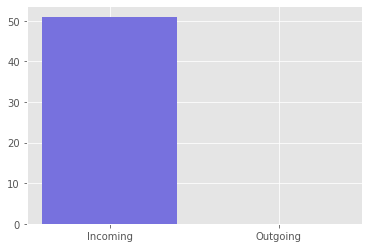

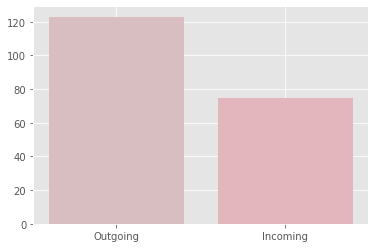

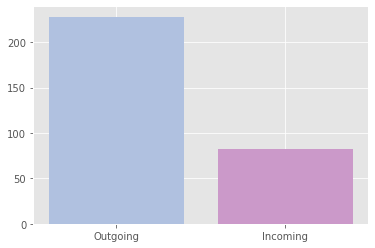

In [317]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Suport", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

outgoing_add = {'Outgoing' : 0}
complaints.update(outgoing_add)
complaints
plt.bar(range(len(complaints)), list(complaints.values()),align = 'center', color = "#7771de")
plt.xticks(range(len(complaints)), list(complaints.keys()))
plt.show()

plt.bar(range(len(sales_support)), list(sales_support.values()),align = 'center', color= ["#d8bdc1",  "#e3b6bd" ])
plt.xticks(range(len(sales_support)), list(sales_support.keys()))
plt.show()

plt.bar(range(len(product_support)), list(product_support.values()),align = 'center', color = ["#b0c1e0","#cb99c9"])
plt.xticks(range(len(product_support)), list(product_support.keys()))
plt.show()



### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

In [ ]:
#From looking at the data, south semmes to be operating more efficiently with the exception of their service level but even then they aren't as far off.
#Question 2: North has less reps and seem to need more help as their abandonment rate is higher which is something that the compay should be concerned more about as it's less customers
# being help and in return will get worse reviews. 
# I thing 3 reps at North would be sufficient in helping them reduce their abandonment rate and that way they can also improve their answer calls of 2.0 seconds.
# Sending 2 reps at south will help as they have a higher volume of calls, higher wait time (which will be lessen with the 2 reps). 


## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [324]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
total_calls = call_times.groupby("Time Block").sum().plot.bar()
plt.title('Number of calls in time block')
# Use groupby and get_group to select which call purpose to plot:
#call_times_group.plot.bar()
complaint_times = call_times.groupby("Call Purpose").get_group("Complaint").value_counts().plot.bar()
sales_time = call_times.groupby("Call Purpose").get_group("Product Support").value_counts().plot.bar()
product_t = call_times.groupby("Call Purpose").get_group("Sales Support").value_counts().plot.bar()
plt.savefig('bar_grouped.png')
plt.show


#trying to use a grouped bar but its not working as of this moment. #standby

SyntaxError: invalid syntax (Temp/ipykernel_1232/2866448527.py, line 2)